# Computational Physics: Problem Set 2

## Exercise 1)

### Solving nonlinear equations I

### 6.11 Overrelaxation

In [312]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import argrelextrema
plt.style.use('seaborn-poster')
%matplotlib inline

#### 6.11 b) Relaxation method


In [313]:
x = 1.0 #starting guess
c = 2.0 #exp factor
i=1

iterations = []

#Relaxation method


while (abs(x-(1-np.exp(-c*x)))>10**(-6)):
        x = 1 - np.exp(-c*x)
        
        iterations.append(i)
        i += 1
        print(x)

print(iterations[-1])


0.8646647167633873
0.8225966691808597
0.8070247503317746
0.8009201942366403
0.7984747083247583
0.7974866394625985
0.797086049491047
0.796923413762181
0.7968573480008734
0.7968305046795713
0.7968195968986895
0.7968151643557075
0.7968133630966887
13


#### 6.11 c) Overrelaxation method

In [314]:
x = 1.0 #starting guess
c = 2.0 #exp factor
i=1
#w_neg=-0.8
w=0.5

iterations = []

#Overrelaxation method


while (abs(x-((1+w)*(1 - np.exp(-c*x))-w*x))>10**(-6)):
        x=(1+w)*(1 - np.exp(-c*x))-w*x
        
        iterations.append(i)
        i += 1
        print(x)

print(iterations[-1])


0.796997075145081
0.7968323724281932
0.7968143476015649
0.7968123729832619
4


## Exercise 2)

### Solving nonlinear equations II

### 6.11 Wien's displacement constant

#### 6.11 b) Binary search method

In [315]:
def f(x):
    return 5*np.exp(-x)+x-5

x1=3
x2=6

if f(x2)*f(x1)>0:
    raise ValueError("f(x1) and f(x2) must have opposite signs")

while (abs(x1-x2)>10**(-6)):
    x3=0.5*(x1+x2)
        
    if f(x3)*f(x1)>0:
        x1=x3
            
    else:
        x2=x3

x_root=0.5*(x1+x2)
        
print ('x ≈',x_root)
        

x ≈ 4.965113997459412


## Exercise 3)

### Gradient descent method: Galaxy stellar mass function

### a) Gradient descent method test

In [316]:
# Define function
def f(x,y):
    return (x-2)**2+(y-2)**2

# Numerical diff with central differentiation
def derivative(f, x, y, h=1e-5):
    df_dx = (f(x+h,y) - f(x-h,y))/(2*h)
    df_dy = (f(x,y+h) - f(x,y-h))/(2*h)
    
    return np.array([df_dx, df_dy])

# Gradient descent parameters
gamma = 0.1               # learning rate
tol = 1e-6                # stopping criterion
max_iter = 1000           # iterations
x = np.array([5.0, 5.0])  # initial guess
path = [x.copy()]

# Gradient descent method
for i in range(max_iter):
    grad = derivative(f, x[0], x[1])
    x_new = x-gamma*grad
    path.append(x.copy())

    # convergence criterion
    if np.linalg.norm(x_new - x) < tol:
        print(f"Converged after {i} iterations.")
        break

    x = x_new

path = np.array(path)

print(f"Minimum at: {x}")
print(f"Function value at minimum: {f(x[0], x[1])}")


Converged after 62 iterations.
Minimum at: [2.00000294 2.00000294]
Function value at minimum: 1.7315334744245115e-11


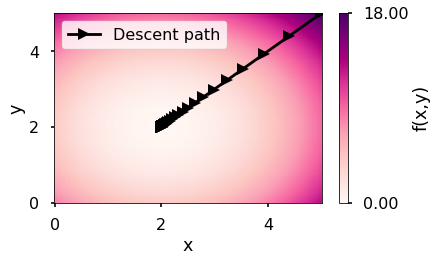

In [293]:
# Grid for plot
x_vals = np.linspace(0, 5, 200)
y_vals = np.linspace(0, 5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Continuous color map
fig, ax = plt.subplots(figsize=(6,3.5))
c = ax.pcolormesh(X, Y, Z, shading='auto', cmap='RdPu')

# Colorbar
cb = plt.colorbar(c, ax=ax, label="f(x,y)")
cb.set_ticks([Z.min(), Z.max()])
cb.set_ticklabels([f"{Z.min():.2f}", f"{Z.max():.2f}"])

# Gradient descent path
ax.plot(path[:,0], path[:,1], 'k>-', label='Descent path')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()


### b) Gradient descent method: Schechter function

Converged after 435 iterations.
Minimum at: [10.97427934 -2.56520821 -1.00643219] (M_s, phi_s, a)
Function value at minimum: 2.9103484667980664


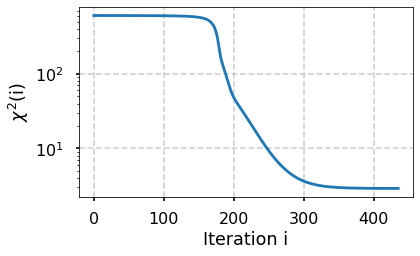

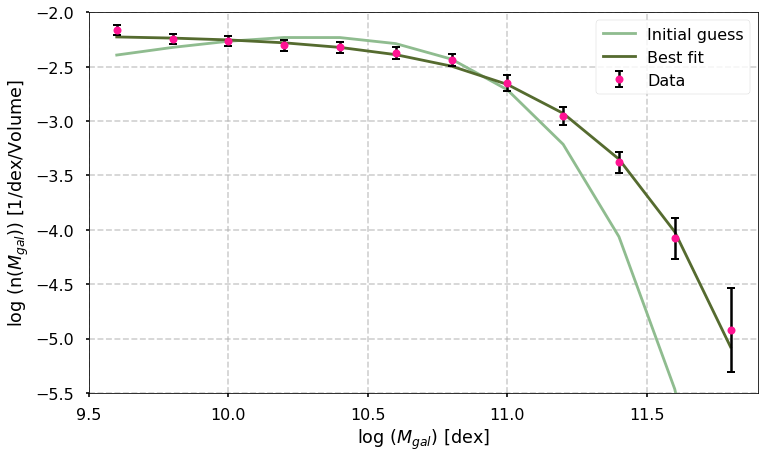

In [317]:
#Load data
data = np.loadtxt("/Users/sara/Downloads/smf_cosmos.csv")
M_gal_col = data[:, 0]
n_col = data[:, 1]
error_col = data[:, 2]


# Define Schechter function
def n(log_M_gal, log_M_s, log_phi_s, a):
    phi_s=np.power(10,log_phi_s)
    M_s=np.power(10,log_M_s)
    M_gal=np.power(10,log_M_gal)
    return phi_s*(M_gal/M_s)**(a+1)*np.exp(-M_gal/M_s)*np.log(10) #log 10

def chi2(p, M_gal_col, n_col, error_col):
    """
    p: parameter vector [M_s, phi_s, a]
    M_gal_col: data on magnitudes of galaxies
    n_col: observed values of galaxy stellar mass fct
    error_col: measured error
    """
    model = n(M_gal_col, p[0], p[1], p[2])
    chi2 = np.sum(((n_col - model) / error_col)**2)
    return chi2

# Numerical diff with central differentiation
def derivative(chi2, p, M_gal_col, n_col, error_col, h=0.5):
    p = np.asarray(p, dtype=float)
    grad = np.zeros_like(p)
    
    for i in range(len(p)):
        p_plus = p.copy()
        p_minus = p.copy()
        p_plus[i] += h
        p_minus[i] -= h
        
        f_plus = chi2(p_plus, M_gal_col, n_col, error_col)
        f_minus = chi2(p_minus, M_gal_col, n_col, error_col)
        
        grad[i] = (f_plus - f_minus) / (2*h)
    return grad


# Gradient descent parameters
gamma = 1e-4            # learning rate
tol = 1e-4               # stopping criterion
max_iter = 1000           # iterations

chi2_vals = []

#p0=np.array([11.0, -2.5, -1.0])
#p0 = np.array([10.0, -2.0, -0.5])
#p0 = np.array([9.0, -2.0, -1.0])
p0 = np.array([9.0, -3.2, -0.7])  # initial guess?

# Gradient descent method
for i in range(max_iter):
    grad = derivative(chi2, p0, M_gal_col, n_col, error_col, h=1e-5)
    p_new = p0-gamma*grad
    
    chi2_vals.append(chi2(p_new, M_gal_col, n_col, error_col))

    # convergence criterion
    if np.linalg.norm(p_new - p0) < tol:
        print(f"Converged after {i} iterations.")
        break

    p0=p_new


print(f"Minimum at: {p0} (M_s, phi_s, a)")
print(f"Function value at minimum: {chi2(p0, M_gal_col, n_col, error_col)}")


#Fit data
#verify by showing that same result for different locations

#plot: chi2 as fct of step size i
plt.figure(figsize=(6,3.5))
plt.plot(chi2_vals)
plt.yscale('log')
plt.xlabel("Iteration i")
plt.ylabel(r"$\chi^2$(i)")
plt.grid(True, ls="--", alpha=0.6)
plt.show()


#plot:first guess and best fit log-log
plt.figure(figsize=(12,7))
plt.errorbar(M_gal_col, np.log10(n_col),
             yerr=1/(np.log(10)*n_col)*error_col,
             fmt='o', markersize=8, color='deeppink',
             ecolor='black', elinewidth=2.5,
             capsize=4, capthick=2, zorder=3,
             label='Data') #plot data # calculate error for logscale
plt.plot(M_gal_col, np.log10(n(M_gal_col, log_M_s=10.63, log_phi_s=-2.23, a=-0.53)), color='darkseagreen', label='Initial guess')
#plt.plot(M_gal_col, np.log10(n(M_gal_col, log_M_s=10.95, log_phi_s=-2.54, a=-0.98)), label='2nd guess')
#plt.plot(M_gal_col, np.log10(n(M_gal_col, log_M_s=10.96, log_phi_s=-2.55, a=-1.0)), label='3rd guess')
plt.plot(M_gal_col, np.log10(n(M_gal_col, log_M_s=10.98, log_phi_s=-2.57, a=-1.0)), color='darkolivegreen', label='Best fit')
plt.xlabel(r"log ($M_{gal}$) [dex]")
plt.ylabel(r"log (n($M_{gal}$)) [1/dex/Volume]")
plt.xlim(9.5,11.9)
plt.ylim(-5.5,-2)
plt.legend()
plt.grid(True, ls="--", alpha=0.6)
plt.show()

Run 1: converged after 101 iterations.
  Final parameters (M_s, phi_s, a): [10.97427746 -2.56520531 -1.00642934]
  Final chi² = 2.9104

Run 2: converged after 272 iterations.
  Final parameters (M_s, phi_s, a): [10.97428531 -2.56521742 -1.00644127]
  Final chi² = 2.9103

Run 3: converged after 300 iterations.
  Final parameters (M_s, phi_s, a): [10.97426542 -2.56518675 -1.00641104]
  Final chi² = 2.9104

Run 4: converged after 435 iterations.
  Final parameters (M_s, phi_s, a): [10.97427934 -2.56520821 -1.00643219]
  Final chi² = 2.9103



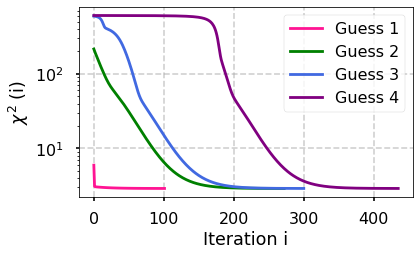

In [308]:
#Multiple initial conditions

# Define a list of different initial guesses
initial_conditions = [
np.array([11.0, -2.5, -1.0]),
np.array([10.0, -2.0, -0.5]),
np.array([9.0, -2.0, -1.0]),
np.array([9.0, -3.2, -0.7])  # initial guess
]

gamma = 1e-4     # learning rate
tol = 1e-4        # stopping criterion
max_iter = 1000

# Store results for each run
results = []

# Loop over all initial guesses
for idx, p0 in enumerate(initial_conditions):
    p = p0.copy()
    chi2_vals = []

    for i in range(max_iter):
        grad = derivative(chi2, p, M_gal_col, n_col, error_col, h=1e-5)
        p_new = p - gamma * grad

        chi2_vals.append(chi2(p_new, M_gal_col, n_col, error_col))

        if np.linalg.norm(p_new - p) < tol:
            print(f"Run {idx+1}: converged after {i} iterations.")
            break

        p = p_new

    final_chi2 = chi2(p, M_gal_col, n_col, error_col)
    results.append((p, final_chi2, chi2_vals))

    print(f"  Final parameters (M_s, phi_s, a): {p}")
    print(f"  Final chi² = {final_chi2:.4f}\n")

# Plot
colors = ["deeppink", "green", "royalblue", "purple"]

plt.figure(figsize=(6,3.5))
for idx, (_, _, chi2_vals) in enumerate(results):
    plt.plot(chi2_vals, color=colors[idx],label=f"Guess {idx+1}")
plt.xlabel("Iteration i")
plt.ylabel(r"$\chi^2$ (i)")
plt.yscale("log")   # optional, often helps visualize convergence
plt.legend()
plt.grid(True, ls="--", alpha=0.6)
plt.show()